In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [6]:
files = [file for file in os.listdir() if file.endswith(".csv")]
files

['steady_bottom.csv',
 'steady_noise.csv',
 'to_and_out.csv',
 'in_and_out_2.csv',
 'test_noise.csv']

In [14]:
def plot_data(path_to_file: str):
    df = pd.read_csv(path_to_file, sep=";")
    for column in df.columns:
        plt.plot(df[column].values.tolist(), label = str(column) + ", uT")
    
    df.apply(lambda row : math.sqrt(row['x']**2 + row['y']**2 + row['z']**2), axis = 1)
    
    plt.legend()
    plt.show()

Magnetometers, HMC5883 included, measure the **magnetic field strength**.

These magnetometer chips can measure field strengths from `2mGauss` (1.0 × 10^(-7)Т) to `8Gauss`. Since the average field strength of the Earth's magnetic field is between `30uT` (0.3 Gauss, 3 * 10^(-5)T) and `60uT` (0.6G)
These chips easily measure the Earth's magnetic field strength, as well as magnetic fields from higher strength magnetic materials. Then, if one wants to calculate the heading (use magnetometer as compass), he/she should use the following formula:  `D = arctan(yGaussData/xGaussData)∗(180/π)`.

According to the Adafruit's Library realisation, the sensor's measurement will consist of:
```event->magnetic.x =
      _magData.x / _hmc5883_Gauss_LSB_XY * SENSORS_GAUSS_TO_MICROTESLA;
  event->magnetic.y =
      _magData.y / _hmc5883_Gauss_LSB_XY * SENSORS_GAUSS_TO_MICROTESLA;
  event->magnetic.z =
      _magData.z / _hmc5883_Gauss_LSB_Z * SENSORS_GAUSS_TO_MICROTESLA;
```
, where magData.x/y/z is a row data from a sensor, _hmc5883_Gauss_LSB_XY - default gain, which is equal to `1100.0F` LSb/gauss (where LSB stands for Least Significant Bits and the 1100 LSB / Gauss number indicates that a reading of 1100 is equivalent to 1 Gauss, a reading of 2200 is equivalent to 2 Gauss and so on). This gain is provided in the datasheet, by the manufacturer

steady_bottom.csv


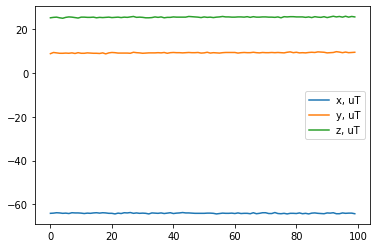

steady_noise.csv


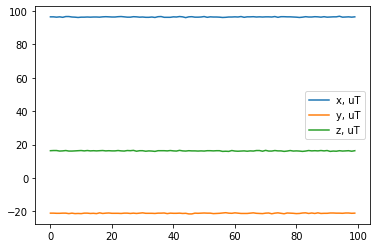

to_and_out.csv


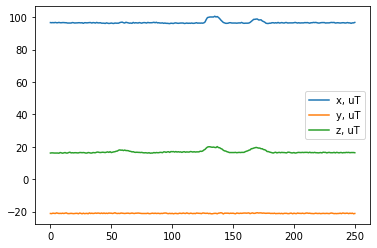

in_and_out_2.csv


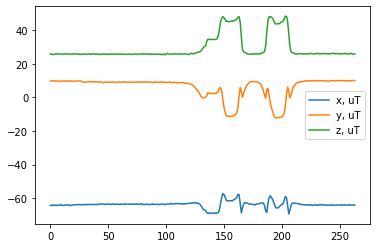

In [15]:
for file in files[:-1]:
    print(file)
    plot_data(file)

### Why there is a change?
Magnetic sensors allow one to:
- detect the presence of ferromagnetic objects. As everyone knows, Ferromagnetism is a kind of magnetism that is mostly associated with iron, cobalt and nickel. Therefore most of the signal can be expected to emanate from rather massive components like engine, gearbox, driveshaft, axles and wheel suspensions. Source: http://article.sapub.org/10.5923.j.ijme.20180803.02.html ![what_metals_are_used](http://article.sapub.org/image/10.5923.j.ijme.20180803.02_001.gif)

Why at all use this method:
P.S
- not requires no energy to be emitted, thus minimizing both energy consumption and risk of electromagnetic interference



### Magnetic detector principle

http://hyperphysics.phy-astr.gsu.edu/hbase/magnetic/curloo.html